In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [39]:
print(tf.__version__) #2.8.0 버전
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

2.8.0
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


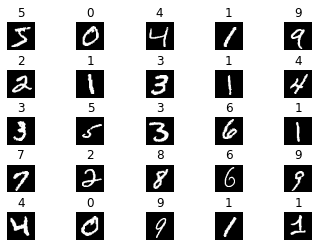

In [40]:
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,i*5+j+1)
        plt.axis('off')
        plt.imshow(x_train[i*5+j],cmap='gray')
        plt.title(y_train[i*5+j])
plt.subplots_adjust(hspace=0.7)


In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [42]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3770 - accuracy: 0.7589
Epoch 2/5
1875/1875 [==============================] - 2s 962us/step - loss: 0.5891 - accuracy: 0.8411
Epoch 3/5
1875/1875 [==============================] - 2s 982us/step - loss: 0.4858 - accuracy: 0.8662
Epoch 4/5
1875/1875 [==============================] - 2s 896us/step - loss: 0.4152 - accuracy: 0.8852
Epoch 5/5
313/313 [==============================] - 0s 743us/step - loss: 0.2672 - accuracy: 0.9372


[0.26723629236221313, 0.9372000098228455]

In [17]:
import cv2 

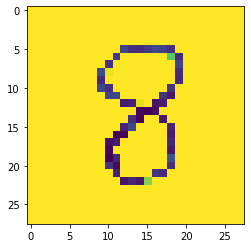

In [46]:
img = cv2.imread("test.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resize_img = cv2.resize(img, (28,28))
resize_img = 255-resize_img
resize_img = resize_img/255.0
plt.imshow(resize_img)
resize_img = resize_img.reshape(1,28,28)
np.argmax(model.predict(resize_img),1)
